<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab5/B40_E22CSEU1183_SANCHIT/LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

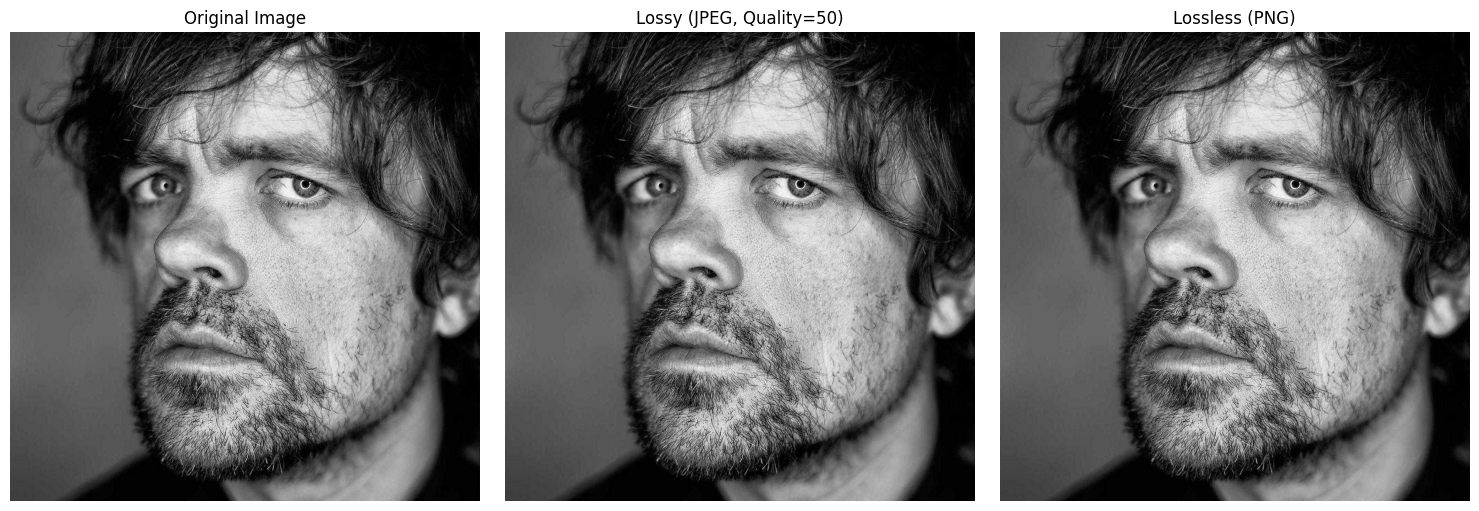

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import io

def display_compressed_images(input_image_path, quality):
    # Open the input image
    image = Image.open(input_image_path)

    # Create lossy compressed image (JPEG)
    lossy_image = image.copy()
    lossy_image.save(input_image_path, "JPEG", quality=quality)  # Temporarily save as JPEG
    lossy_image = Image.open(input_image_path)

    # Create lossless compressed image (PNG) in memory
    # Keep the buffer open to prevent the error
    buffer = io.BytesIO()
    image.save(buffer, "PNG")
    buffer.seek(0)
    lossless_image = Image.open(buffer)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    # Display images on subplots
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')  # Hide axes

    axes[1].imshow(lossy_image)
    axes[1].set_title(f"Lossy (JPEG, Quality={quality})")
    axes[1].axis('off')

    axes[2].imshow(lossless_image)
    axes[2].set_title("Lossless (PNG)")
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
input_image_path = "Face.jpg"
quality = 50  # Adjust quality from 0 (worst) to 100 (best)

display_compressed_images(input_image_path, quality)

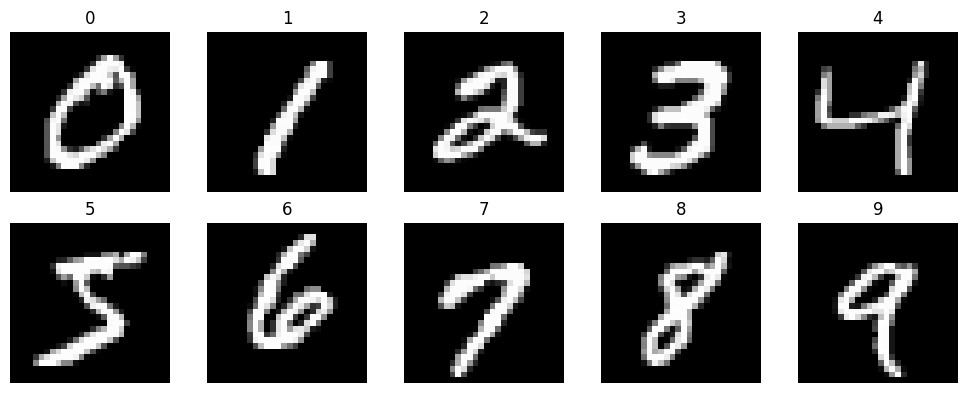

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)




Epoch 1/50
188/188 - 5s - 26ms/step - accuracy: 0.8726 - loss: 1.2505 - val_accuracy: 0.9689 - val_loss: 0.1009
Epoch 2/50
188/188 - 2s - 10ms/step - accuracy: 0.9790 - loss: 0.0712 - val_accuracy: 0.9787 - val_loss: 0.0710
Epoch 3/50
188/188 - 2s - 10ms/step - accuracy: 0.9868 - loss: 0.0424 - val_accuracy: 0.9811 - val_loss: 0.0644
Epoch 4/50
188/188 - 1s - 7ms/step - accuracy: 0.9920 - loss: 0.0264 - val_accuracy: 0.9812 - val_loss: 0.0645
Epoch 5/50
188/188 - 1s - 7ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9840 - val_loss: 0.0579
Epoch 6/50
188/188 - 1s - 7ms/step - accuracy: 0.9962 - loss: 0.0123 - val_accuracy: 0.9846 - val_loss: 0.0579
Epoch 7/50
188/188 - 1s - 6ms/step - accuracy: 0.9975 - loss: 0.0083 - val_accuracy: 0.9851 - val_loss: 0.0548
Epoch 8/50
188/188 - 1s - 7ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9866 - val_loss: 0.0525
Epoch 9/50
188/188 - 1s - 7ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9844 - val_loss: 0.

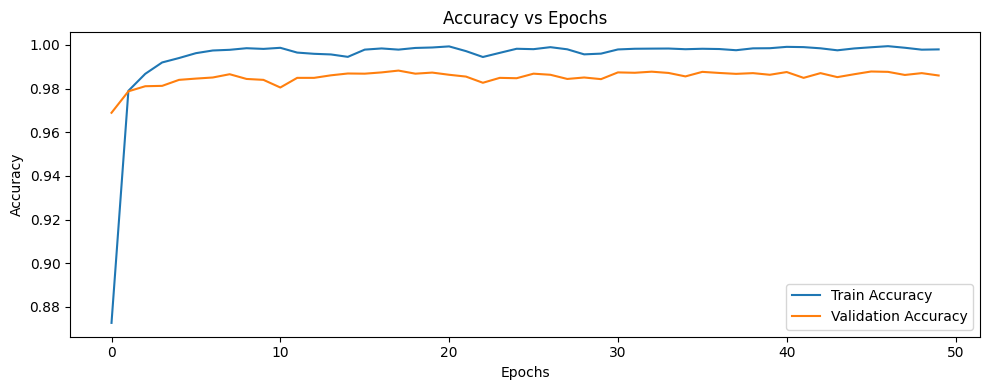




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Precision,Recall,F-Measure,ROC AUC
0,98.61,98.62,98.61,98.61,99.99


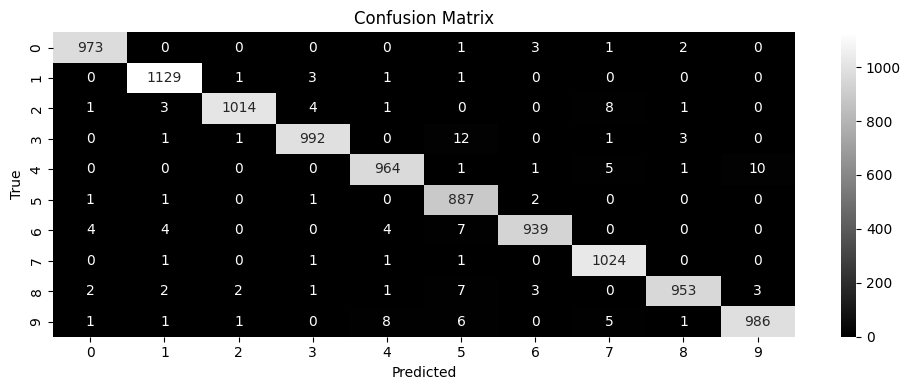

In [5]:
import numpy as np
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist, cifar10
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def display_sample_images(x_train, y_train, dataset='mnist'):
    class_names = {
        'mnist': [str(i) for i in range(10)],
        'cifar10': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    }

    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()
    for i in range(10):
        if dataset == 'mnist':
            axes[i].imshow(x_train[y_train == i][0], cmap='gray')
        elif dataset == 'cifar10':
            axes[i].imshow(x_train[np.where(y_train == i)[0][0]])
        axes[i].set_title(class_names[dataset][i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_and_evaluate_cnn(dataset='mnist'):
    if dataset == 'mnist':
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
        input_shape = (28, 28, 1)
    elif dataset == 'cifar10':
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0
        input_shape = (32, 32, 3)

    display_sample_images(x_train, y_train, dataset=dataset)
    model = create_cnn_model(input_shape)
    print('\n\n')
    model.summary()
    print('\n\n')

    # Train the model
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=256, verbose=2)
    print('\n\n')

    # Plot accuracy vs epoch graph
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print('\n\n')

    # Evaluate the model
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = y_test.flatten()

    # Metrics
    accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f_measure = f1_score(y_true, y_pred_classes, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')

    metrics = {
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F-Measure': [f_measure],
        'ROC AUC': [roc_auc]
    }

    df_metrics = pd.DataFrame(metrics)
    df_metrics *= 100
    display(df_metrics.round(2))
    print('\n\n')

    # Plot confusion matrix using Seaborn
    plt.figure(figsize=(10, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gist_yarg_r')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use the function for MNIST dataset
train_and_evaluate_cnn(dataset='mnist')

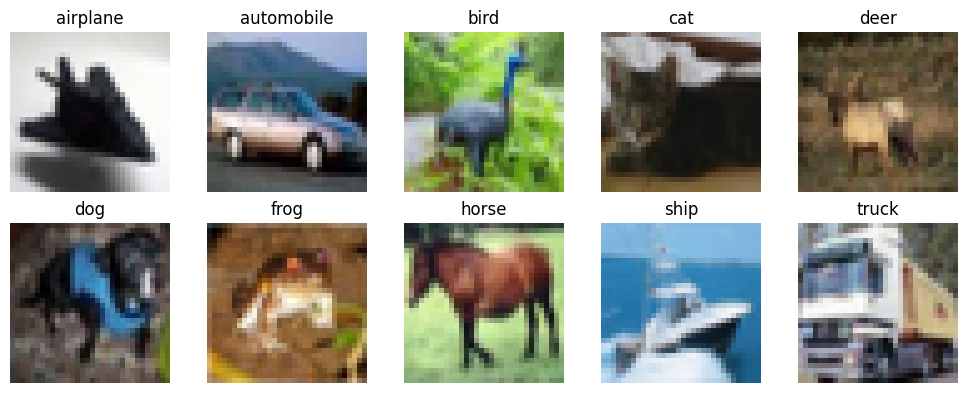

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)




Epoch 1/50
157/157 - 5s - 33ms/step - accuracy: 0.4069 - loss: 1.6389 - val_accuracy: 0.4778 - val_loss: 1.4441
Epoch 2/50
157/157 - 3s - 17ms/step - accuracy: 0.5454 - loss: 1.2796 - val_accuracy: 0.5565 - val_loss: 1.2670
Epoch 3/50
157/157 - 1s - 9ms/step - accuracy: 0.5975 - loss: 1.1443 - val_accuracy: 0.5912 - val_loss: 1.1723
Epoch 4/50
157/157 - 2s - 11ms/step - accuracy: 0.6332 - loss: 1.0527 - val_accuracy: 0.6248 - val_loss: 1.0736
Epoch 5/50
157/157 - 2s - 14ms/step - accuracy: 0.6615 - loss: 0.9776 - val_accuracy: 0.6454 - val_loss: 1.0307
Epoch 6/50
157/157 - 1s - 8ms/step - accuracy: 0.6773 - loss: 0.9261 - val_accuracy: 0.6592 - val_loss: 0.9884
Epoch 7/50
157/157 - 1s - 9ms/step - accuracy: 0.6949 - loss: 0.8740 - val_accuracy: 0.6688 - val_loss: 0.9598
Epoch 8/50
157/157 - 3s - 16ms/step - accuracy: 0.7140 - loss: 0.8278 - val_accuracy: 0.6692 - val_loss: 0.9595
Epoch 9/50
157/157 - 3s - 16ms/step - accuracy: 0.7225 - loss: 0.7945 - val_accuracy: 0.6606 - val_loss:

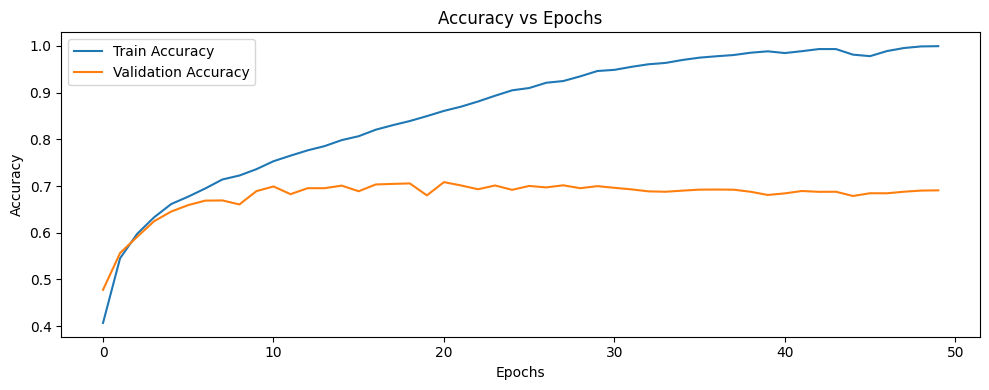




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Precision,Recall,F-Measure,ROC AUC
0,69.44,69.79,69.44,69.55,94.71


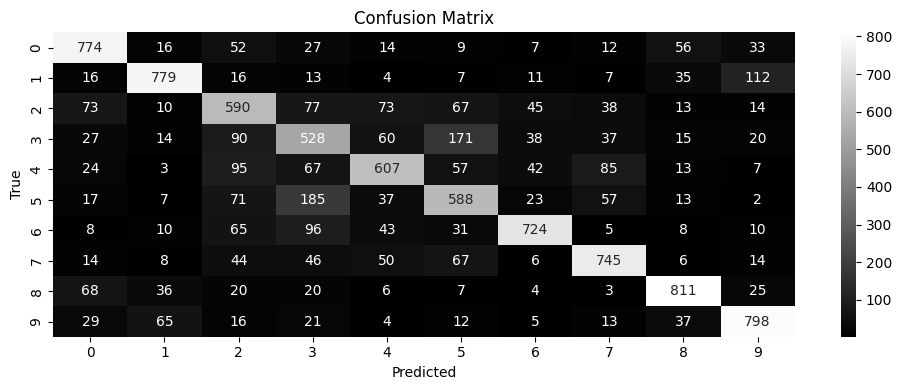

In [6]:
# Use the function for CIFAR-10 dataset
train_and_evaluate_cnn(dataset='cifar10')